Titanic Ship Case Study


**Problem Description: **On April 15, 1912, during her maiden voyage, the Titanic sank after colliding
with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.


  * One of the reasons that the shipwreck led to such loss of life was that there were not
enough lifeboats for the passengers and crew.


* Although there was some element of luck involved in surviving the sinking, some groups of
people were more likely to survive than others, such as women, children, and the upper-class.


The problem associated with the Titanic dataset is to predict whether a passenger survived the
disaster or not. The dataset contains various features such as passenger class, age, gender,
cabin, fare, and whether the passenger had any siblings or spouses on board. These features can
be used to build a predictive model to determine the likelihood of a passenger surviving the
disaster. The dataset offers opportunities for feature engineering, data visualization, and model
selection, making it a valuable resource for developing and testing data analysis and machine
learning skills.



Perform Below Tasks to complete the assignment:-
1. Download the dataset: Dataset
2. Load the dataset.
3. Perform Below Visualizations.

  ● Univariate Analysis
  
  ● Bi - Variate Analysis
  
  ● Multi - Variate Analysis

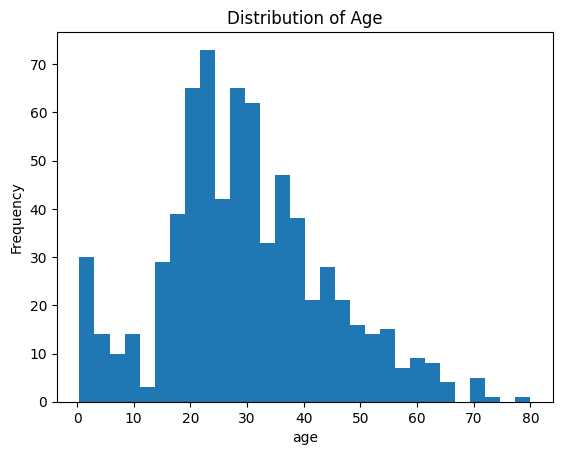

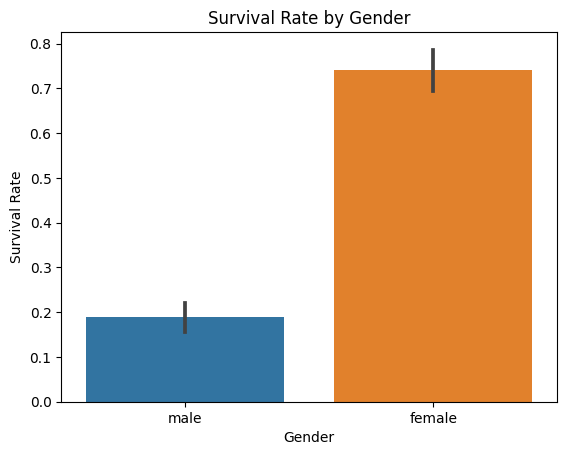

<ipython-input-4-bd735cbc6dba>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


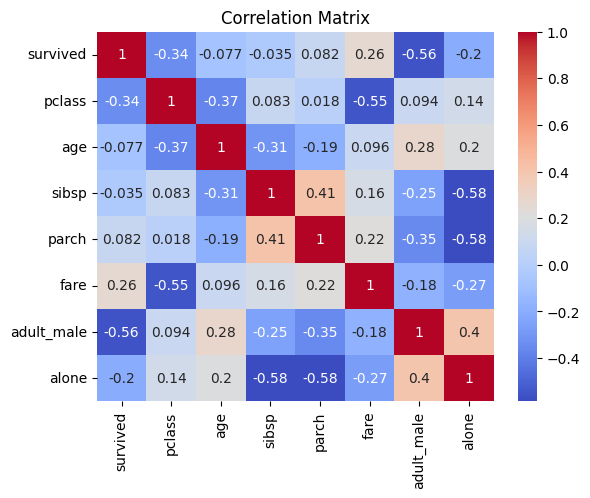

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('titanic(1).csv')

# Univariate Analysis
# Example: Histogram of Age
plt.hist(df['age'].dropna(), bins=30)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Bi-Variate Analysis
# Example: Bar plot of Survival Rate by Gender
sns.barplot(x='sex', y='survived', data=df)
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()

# Multi-Variate Analysis
# Example: Heatmap of Correlations between Variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Perform descriptive statistics on the dataset


In [6]:
# Calculate descriptive statistics
descriptive_stats = df.describe()

# Display the descriptive statistics
print(descriptive_stats)


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Handle the Mising Values

In [9]:
# Impute missing values with the mean of the column
df['age'].fillna(df['age'].mean(), inplace=True)

# Impute missing values with the mode of the column
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


Find the outliers and replace the outliers

In [11]:
import numpy as np
from scipy.stats import zscore

# Calculate z-scores for numerical columns
numeric_columns = ['age', 'fare']
z_scores = np.abs(zscore(df[numeric_columns]))

# Set a threshold for identifying outliers
threshold = 3

# Find indices of outliers based on z-scores
outlier_indices = np.where(z_scores > threshold)

# Replace outliers with the median of the column
df[numeric_columns] = np.where(z_scores > threshold, df[numeric_columns].median(), df[numeric_columns])


 Check for Categorical columns and perform encoding

In [12]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Perform one-hot encoding
encoded_df = pd.get_dummies(df, columns=categorical_columns)

# Display the encoded DataFrame
print(encoded_df)

     survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
1           1       1  38.0      1      0  71.2833       False  False   
3           1       1  35.0      1      0  53.1000       False  False   
6           0       1  54.0      0      0  51.8625        True   True   
10          1       3   4.0      1      1  16.7000       False  False   
11          1       1  58.0      0      0  26.5500       False   True   
..        ...     ...   ...    ...    ...      ...         ...    ...   
871         1       1  47.0      1      1  52.5542       False  False   
872         0       1  33.0      0      0   5.0000        True   True   
879         1       1  56.0      0      1  83.1583       False  False   
887         1       1  19.0      0      0  30.0000       False   True   
889         1       1  26.0      0      0  30.0000        True   True   

     sex_female  sex_male  ...  deck_C  deck_D  deck_E  deck_F  deck_G  \
1             1         0  ...       1       0   

Split the data into dependent and independent variables

In [14]:
# Split into dependent (target) variable and independent variables
X = df.drop('survived', axis=1)  # Independent variables
y = df['survived']  # Dependent (target) variable

# Display the independent variables
print(X.head())

# Display the dependent variable
print(y.head())

    pclass     sex   age  sibsp  parch     fare embarked  class    who  \
1        1  female  38.0      1      0  71.2833        C  First  woman   
3        1  female  35.0      1      0  53.1000        S  First  woman   
6        1    male  54.0      0      0  51.8625        S  First    man   
10       3  female   4.0      1      1  16.7000        S  Third  child   
11       1  female  58.0      0      0  26.5500        S  First  woman   

    adult_male deck  embark_town alive  alone  
1        False    C    Cherbourg   yes  False  
3        False    C  Southampton   yes  False  
6         True    E  Southampton    no   True  
10       False    G  Southampton   yes  False  
11       False    C  Southampton   yes   True  
1     1
3     1
6     0
10    1
11    1
Name: survived, dtype: int64


 Scale the independent variables

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Split into dependent (target) variable and independent variables
X = df.drop('survived', axis=1)  # Independent variables
y = df['survived']  # Dependent (target) variable

# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X)

# Perform scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Display the scaled independent variables
scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)
print(scaled_df.head())


     pclass       age     sibsp     parch      fare  adult_male     alone  \
0  0.827377 -0.530377  0.432793 -0.473674 -0.502445    0.811922 -1.231645   
1 -1.566107  0.571831  0.432793 -0.473674  0.786845   -1.231645 -1.231645   
2  0.827377 -0.254825 -0.474545 -0.473674 -0.488854   -1.231645  0.811922   
3 -1.566107  0.365167  0.432793 -0.473674  0.420730   -1.231645 -1.231645   
4  0.827377  0.365167 -0.474545 -0.473674 -0.486337    0.811922  0.811922   

   sex_female  sex_male  embarked_C  ...    deck_C    deck_D    deck_E  \
0   -0.737695  0.737695   -0.482043  ... -0.266296 -0.196116 -0.193009   
1    1.355574 -1.355574    2.074505  ...  3.755222 -0.196116 -0.193009   
2    1.355574 -1.355574   -0.482043  ... -0.266296 -0.196116 -0.193009   
3    1.355574 -1.355574   -0.482043  ...  3.755222 -0.196116 -0.193009   
4   -0.737695  0.737695   -0.482043  ... -0.266296 -0.196116 -0.193009   

     deck_F    deck_G  embark_town_Cherbourg  embark_town_Queenstown  \
0 -0.121681 -0.06715

Split the data into training and testing


In [29]:
from sklearn.model_selection import train_test_split

# Split into dependent (target) variable and independent variables
X = df.drop('survived', axis=1)  # Independent variables
y = df['survived']  # Dependent (target) variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the subsets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (712, 14) (712,)
Testing set shape: (179, 14) (179,)
